# Pymaceuticals Inc.
---

### Analysis

- Two drugs, Capamulin and Ramicane, had the most number of observed timepoints.
- These two drugs also appear to be the most effective in reducing tumor size.
- There is a positive correlation between tumor size and weight of mouse.
 

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single DataFrame
merged_mouse_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
pd.DataFrame(merged_mouse_data_df)

# Display the data table for preview
merged_mouse_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
#Display the number of unique mice IDs in the data 

merged_mouse_data_df["Mouse ID"].nunique()

249

In [5]:
# Get list of all rows for mouse with duplicate rows (referred to TylerJames' subsets solution within duplicated from Stackoverflow:https://stackoverflow.com/questions/71957360/using-pandas-to-drop-duplicates-for-subsets-of-rows)  
Duplicate_mice = merged_mouse_data_df[merged_mouse_data_df[['Mouse ID' , 'Timepoint']].duplicated() == True]

DuplicateID = Duplicate_mice['Mouse ID'].iloc[0] 

RowsFromDuplicateMouse = merged_mouse_data_df[merged_mouse_data_df["Mouse ID"] == DuplicateID]
RowsFromDuplicateMouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Drop duplicated mice (referred to: https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/?expand_article=1), specifically: 
# df = df.drop(df[df.score < 50].index

clean_merged_mice = merged_mouse_data_df.drop(merged_mouse_data_df[merged_mouse_data_df['Mouse ID']==DuplicateID].index)
clean_merged_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
clean_merged_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen
# First, set the Drug Regimen as the index: 
clean_merged_mice_drugs = clean_merged_mice.set_index("Drug Regimen")
clean_merged_mice_drugs



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [9]:
# Use groupby and summary statistical methods to collect mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_TV = clean_merged_mice_drugs.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
Median_TV = clean_merged_mice.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
TV_Variance = clean_merged_mice.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
TVS_Dev = clean_merged_mice.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
TVS_Err = clean_merged_mice.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

In [10]:
# Assemble the resulting series into a single summary DataFrame.

Summary = pd.DataFrame([Mean_TV, Median_TV, TV_Variance, TVS_Dev, TVS_Err], ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Standard Deviation","Tumor Volume SEM"]) 
Summary.T



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

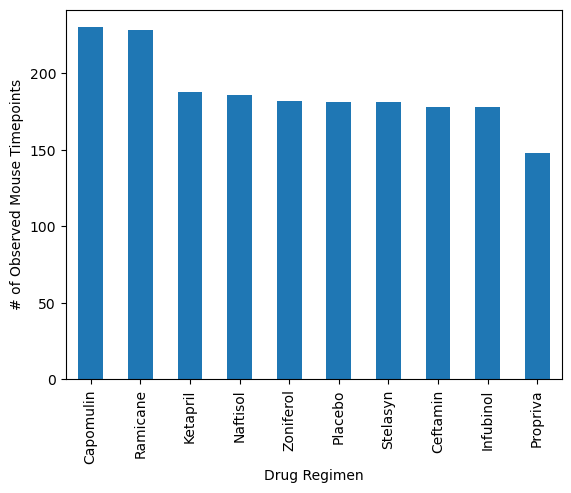

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# referred to  - https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot - for plt.ylabel addition to chart

CountTP = clean_merged_mice_drugs.groupby(["Drug Regimen"]).count()["Timepoint"]
CountTP = CountTP.sort_values(ascending=False)

CountTP.plot.bar(y=["Timepoint"], rot=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

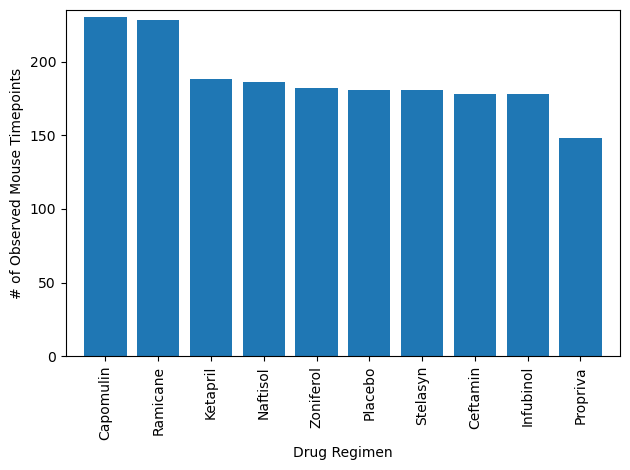

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# can use_index for x ticks

mdata=(clean_merged_mice_drugs.groupby(["Drug Regimen"]).count()["Timepoint"])
mdata= CountTP.sort_values(ascending=False)
drugs = mdata.index
mdata = mdata.array
x_axis = np.arange(0, len(mdata))


plt.bar(x_axis, mdata, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.75, len(mdata)-.25)
plt.ylim(0, max(mdata) + 5)
plt.xticks(x_axis, drugs, rotation = 90)
plt.tight_layout()
plt.show()

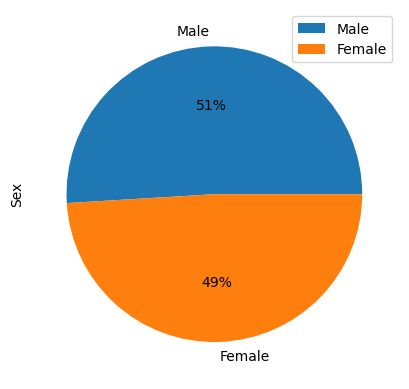

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
CountSex = clean_merged_mice_drugs.groupby(["Sex"]).count()
CountSex = CountSex["Mouse ID"]
CountSex = CountSex.sort_values(ascending=False)
CountSex_df = pd.DataFrame(CountSex)

CountSex_df.rename(columns = {"Mouse ID":"Sex"}, inplace = True)
Pie2 = CountSex_df.plot.pie(subplots=True, autopct="%1.0f%%")
plt.show()

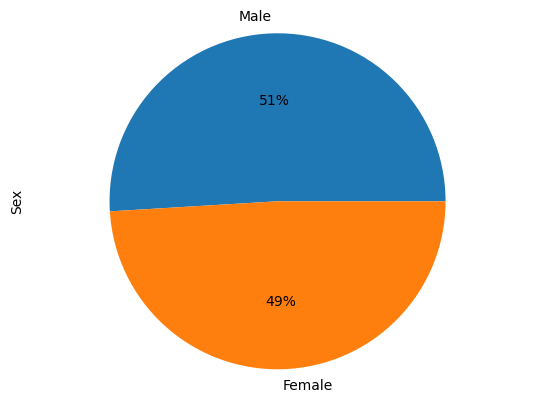

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

CountSex = clean_merged_mice_drugs.groupby(["Sex"]).count()
CountSex = CountSex["Mouse ID"]
CountSex = CountSex.sort_values(ascending=False)
CountSex = CountSex.array
CountSex

plt.pie(CountSex, labels=["Male","Female"], autopct="%1.0f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens

#Setting the index back to Mouse ID from clean merged
Last_timepoint = clean_merged_mice_drugs.reset_index()
Last_timepoint = Last_timepoint.set_index("Mouse ID")
Last_timepoint


,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,Capomulin,0,45.000000,0,Female,9,22
f932,Ketapril,0,45.000000,0,Male,15,29
g107,Ketapril,0,45.000000,0,Female,2,29
a457,Ketapril,0,45.000000,0,Female,11,30
c819,Ketapril,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
r944,Capomulin,45,41.581521,2,Male,12,25
u364,Capomulin,45,31.023923,3,Male,18,17
p438,Ceftamin,45,61.433892,1,Female,11,26


In [ ]:
#Getting the last timepoints for the 4 drugs
Last_timepoint_Capomulin = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == "Capomulin", :]
Last_timepoint_Ramicane = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == "Ramicane", :]
Last_timepoint_Infubinol = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == "Infubinol", :]
Last_timepoint_Ceftamin = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == "Ceftamin", :]

In [92]:
# Getting Capomulin data merged (used the idea to separate each individual drug this way from https://github.com/dmilestone/matplotlib-challenge-cancer-drug-analysis/blob/master/Pymaceuticals_Final.ipynb)

Last_timepoint_Capomulin = Last_timepoint_Capomulin.groupby('Mouse ID').max()['Timepoint']
cap_l_volume = pd.DataFrame(Last_timepoint_Capomulin)
cap_merge = pd.merge(cap_l_volume, clean_merged_mice_drugs, on=("Mouse ID","Timepoint"),how="left")
cap_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Female,9,22
1,b742,45,38.939633,0,Male,7,21
2,f966,20,30.485985,0,Male,16,17
3,g288,45,37.074024,1,Male,3,19
4,g316,45,40.159220,2,Female,22,22
5,i557,45,47.685963,1,Female,1,24
6,i738,45,37.311846,2,Female,23,20
7,j119,45,38.125164,1,Female,7,23
8,j246,35,38.753265,1,Female,21,21
9,l509,45,41.483008,3,Male,17,21


In [93]:
# Getting Ramicane data merged
Last_timepoint_Ramicane = Last_timepoint_Ramicane.groupby('Mouse ID').max()['Timepoint']
ram_l_volume = pd.DataFrame(Last_timepoint_Ramicane)
ram_merge = pd.merge(ram_l_volume, clean_merged_mice_drugs, on=("Mouse ID","Timepoint"),how="left")
ram_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Male,3,22
1,a444,45,43.047543,0,Female,10,25
2,a520,45,38.810366,1,Male,13,21
3,a644,45,32.978522,1,Female,7,17
4,c458,30,38.342008,2,Female,23,20
5,c758,45,33.397653,1,Male,9,17
6,d251,45,37.311236,2,Female,8,19
7,e662,45,40.659006,2,Male,8,24
8,g791,45,29.128472,1,Male,11,16
9,i177,45,33.562402,3,Male,10,18


In [94]:
# Getting Infubinol data merged
Last_timepoint_Infubinol = Last_timepoint_Infubinol.groupby('Mouse ID').max()['Timepoint']
infu_l_volume = pd.DataFrame(Last_timepoint_Infubinol)
infu_merge = pd.merge(infu_l_volume, clean_merged_mice_drugs, on=("Mouse ID","Timepoint"),how="left")
infu_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Female,20,23
1,a251,45,65.525743,1,Female,21,25
2,a577,30,57.031862,2,Female,6,25
3,a685,45,66.083066,3,Male,8,30
4,c139,45,72.226731,2,Male,11,28
5,c326,5,36.321346,0,Female,18,25
6,c895,30,60.969711,2,Female,7,29
7,e476,45,62.435404,1,Male,23,26
8,f345,45,60.918767,1,Male,23,26
9,i386,40,67.289621,4,Female,23,29


In [95]:
# Getting Ceftamin data merged
Last_timepoint_Ceftamin = Last_timepoint_Ceftamin.groupby('Mouse ID').max()['Timepoint']
ceft_l_volume = pd.DataFrame(Last_timepoint_Ceftamin)
ceft_merge = pd.merge(ceft_l_volume, clean_merged_mice_drugs, on=("Mouse ID","Timepoint"),how="left")
ceft_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Female,20,28
1,b447,0,45.000000,0,Male,2,30
2,b487,25,56.057749,1,Female,6,28
3,b759,30,55.742829,1,Female,12,25
4,f436,15,48.722078,2,Female,3,25
5,h531,5,47.784682,0,Male,5,27
6,j296,45,61.849023,3,Female,24,30
7,k210,45,68.923185,3,Male,15,28
8,l471,45,67.748662,1,Female,7,28
9,l490,30,57.918381,3,Male,24,26


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = [cap_merge["Tumor Volume (mm3)"], ram_merge["Tumor Volume (mm3)"], infu_merge["Tumor Volume (mm3)"],ceft_merge["Tumor Volume (mm3)"]]

Tumor_volume_data = []

For x in Treatments:
    

cap_merge["Tumor Volume (mm3)"]
ram_merge["Tumor Volume (mm3)"]
infu_merge["Tumor Volume (mm3)"]
ceft_merge["Tumor Volume (mm3)"]
 



0     62.999356
1     45.000000
2     56.057749
3     55.742829
4     48.722078
5     47.784682
6     61.849023
7     68.923185
8     67.748662
9     57.918381
10    46.784535
11    59.851956
12    64.299830
13    59.741901
14    61.433892
15    64.192341
16    45.000000
17    52.925348
18    45.000000
19    67.527482
20    45.000000
21    64.634949
22    61.386660
23    68.594745
24    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [152]:
# Analysis for each tumor group - Capomulin


Tumors = cap_merge["Tumor Volume (mm3)"]

quartiles = Tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range  is: 7.781863460000004
The the median is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [153]:
# Analysis for each tumor group - Ramicane

Tumors = ram_merge["Tumor Volume (mm3)"]

quartiles = Tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range  is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [169]:
# Analysis for each tumor group - Infubinol

Tumors = infu_merge["Tumor Volume (mm3)"]

quartiles = Tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range  is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [154]:
# Analysis for each tumor group - Ceftamin

Tumors = ceft_merge["Tumor Volume (mm3)"]

quartiles = Tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range  is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

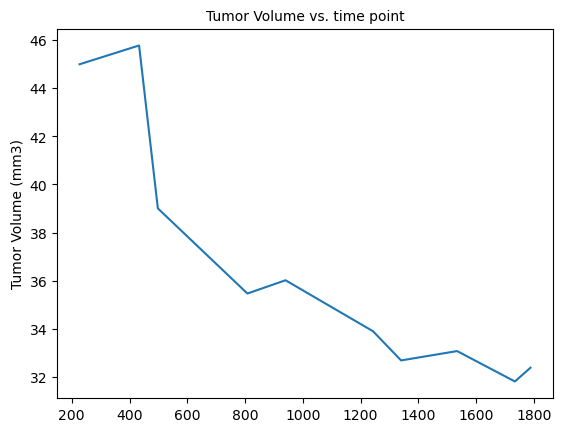

In [168]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
r554 = merged_mouse_data_df[merged_mouse_data_df["Mouse ID"] == "r554"]
r554['Tumor Volume (mm3)'].plot()
plt.title("Tumor Volume vs. time point", size = 10)
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The r-squared is: 0.7686134812139006


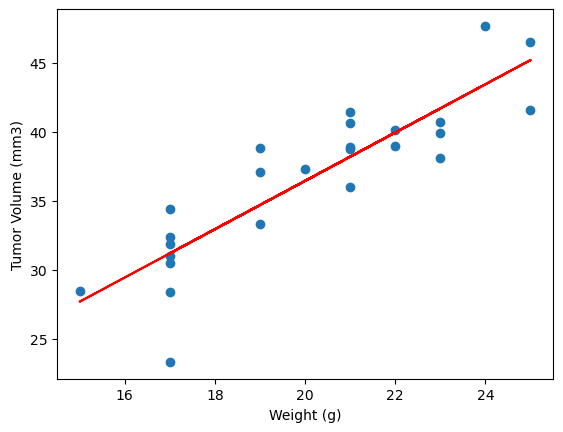

In [126]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


CapCorr = np.corrcoef(cap_merge["Weight (g)"], cap_merge["Tumor Volume (mm3)"])[0,1]
#CapCorr

x_values = cap_merge["Weight (g)"]
y_values = cap_merge["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

